In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train=x_train/255
x_test=x_test/255
x_train.shape

(60000, 28, 28)

In [4]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

C:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 233,162 (910.79 KB)

 Trainable params: 233,162 (910.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.7829 - loss: 0.6518 - val_accuracy: 0.9833 - val_loss: 0.0574
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9704 - loss: 0.1120 - val_accuracy: 0.9857 - val_loss: 0.0516
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9816 - loss: 0.0707 - val_accuracy: 0.9881 - val_loss: 0.0429
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9848 - loss: 0.0605 - val_accuracy: 0.9899 - val_loss: 0.0392
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9889 - loss: 0.0453 - val_accuracy: 0.9894 - val_loss: 0.0417
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9889 - loss: 0.0421 - val_accuracy: 0.9893 - val_loss: 0.0417
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9910 - loss: 0.0339 - val_accuracy: 0.9909 - val_loss: 0.0377
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9920 -

In [7]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [8]:
accuracy_score(y_test,y_pred)

0.9927

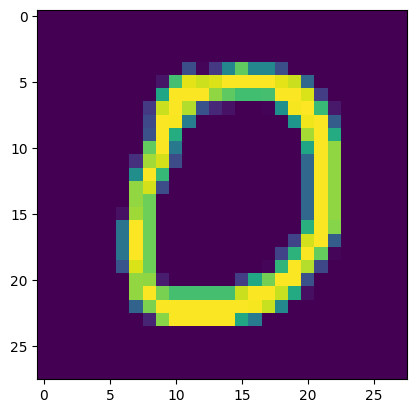

In [9]:
plt.imshow(x_test[10])

In [10]:
y_prob=model.predict(x_test)
y_pred=y_prob.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [11]:
print(y_pred[10])


0


In [12]:
from PIL import Image
import numpy as np
import cv2

(100, 28, 28)
(100, 28, 28)


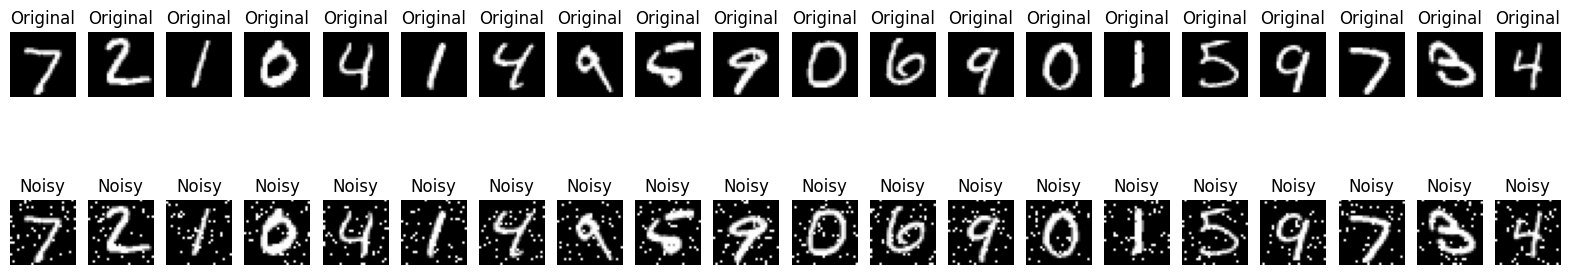

In [42]:
def add_dots(image, num_dots=50):
    noisy_image = image.copy()
    # plt.imshow(noisy_image)
    noisy_image*=255
    # print(noisy_image)
    for _ in range(num_dots):
        x = np.random.randint(0, image.shape[0])
        y = np.random.randint(0, image.shape[1])
        noisy_image[x, y] = 255  # Adding white dot
        # print(noisy_image)
    noisy_image=noisy_image/255
    return noisy_image

# Sample images from the dataset
sample_images = x_test[:100]
print(sample_images.shape)
# Add noise to the sampled images
noisy_images = np.array([add_dots(img) for img in sample_images])
print(noisy_images.shape)

# Display original and noisy images
fig, axes = plt.subplots(2, 20, figsize=(20, 4))
for i in range(20):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(noisy_images[i], cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

plt.show()

In [43]:
y_prob=model.predict(noisy_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [44]:
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 7, 9, 9, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 0, 9], dtype=int64)

In [45]:
accuracy_score(y_test[:100],y_pred)

0.97

(100, 28, 28)
(100, 28, 28)


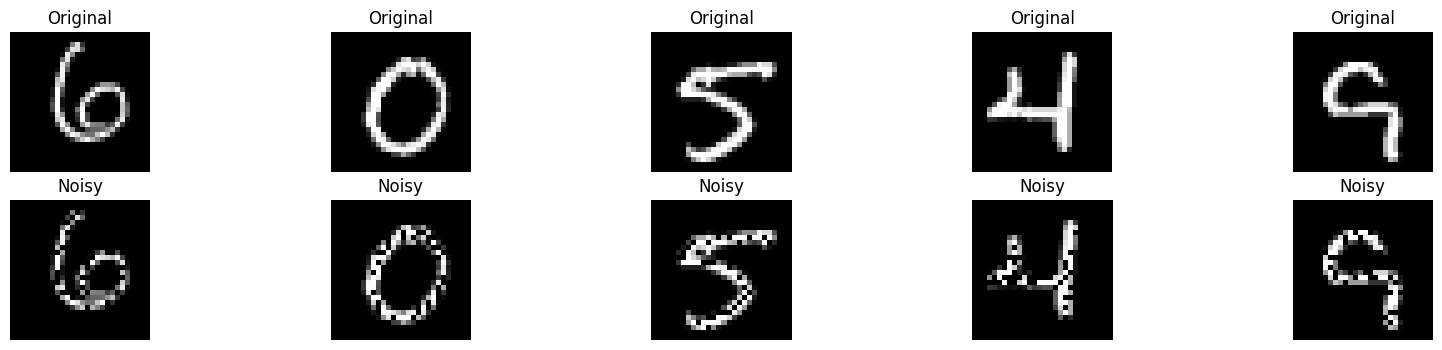

In [76]:
def missing_dots(image, num_dots=80):
    noisy_image = image.copy()
    # plt.imshow(noisy_image)
    noisy_image*=255
    # print(noisy_image)
    cnt=0
    # for i in range(image.shape[0]):
    #     for j in range(image.shape[1]):
    #         if noisy_image[i,j]>=128:
    #             noisy_image[i,j]=0
    #             cnt=cnt+1
    #             if cnt==num_dots:
    #                 noisy_image=noisy_image/255
    #                 return noisy_image
    for _ in range(280):
        i = np.random.randint(0, image.shape[0])
        j = np.random.randint(0, image.shape[1])
        if noisy_image[i,j]>=128:
            noisy_image[i, j] = 0
            cnt=cnt+1
            if cnt==num_dots:
                noisy_image=noisy_image/255
                return noisy_image
        
    noisy_image=noisy_image/255
    return noisy_image

# Sample images from the dataset
sample_images = x_test[100:200]
print(sample_images.shape)
# Add noise to the sampled images
noisy_images = np.array([missing_dots(img) for img in sample_images])
print(noisy_images.shape)

fig, axes = plt.subplots(2, 5, figsize=(20, 4))
for i in range(5):
    axes[0, i].imshow(sample_images[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    axes[1, i].imshow(noisy_images[i], cmap='gray')
    axes[1, i].set_title('Noisy')
    axes[1, i].axis('off')

plt.show()

In [77]:
y_prob=model.predict(noisy_images)
y_pred=y_prob.argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [78]:
accuracy_score(y_test[100:200],y_pred)

0.93